In [1]:
import earthpy as et

et.data.get_data("spatial-vector-lidar")

Extracted output to C:\Users\tranq\earth-analytics\data\spatial-vector-lidar\.


'C:\\Users\\tranq\\earth-analytics\\data\\spatial-vector-lidar\\.'

<Axes: >

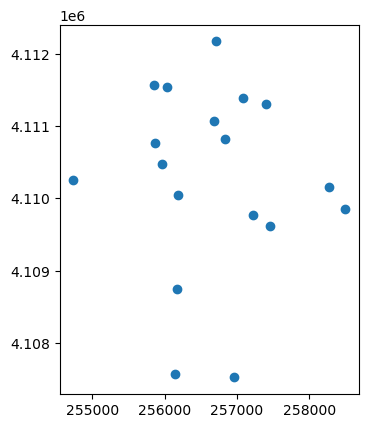

In [4]:
import os
import geopandas as gpd

# Define path to file
plot_centroid_path = os.path.join("spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

sjer_plot_locations.plot()

In [5]:
sjer_plot_locations.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


In [6]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Key metadata for all shapefiles include:
#     Object Type: the class of the imported object.
#     Coordinate Reference System (CRS): the projection of the data.
#     Extent: the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial
#     extent for a shapefile represents the extent for ALL spatial objects in the shapefile.

<Axes: >

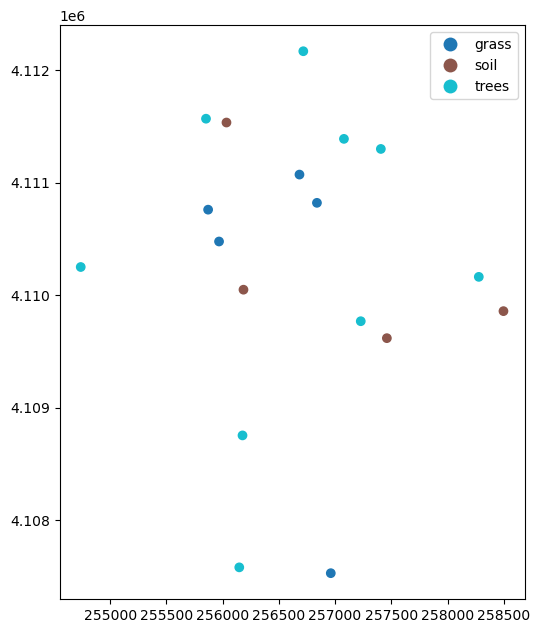

In [10]:
# Geopandas plotting is pretty good
sjer_plot_locations.plot(column = "plot_type", categorical = True, legend = True, figsize = (6,10))

EPSG:4326


<Axes: >

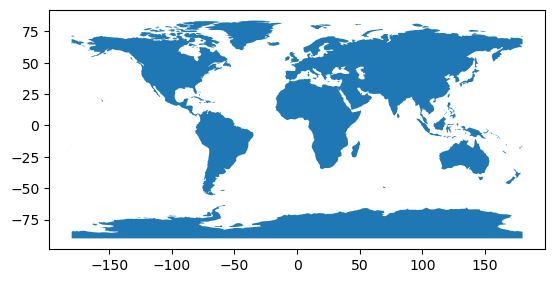

In [23]:
# Import world boundary shapefile
worldBound_path = os.path.join("spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

print(worldBound.crs)

worldBound.plot()

In [24]:
from shapely.geometry import Point
import numpy as np

# Create numpy array of x,y point locations
#     Boulder, Colorado: 40.0274, -105.2519
#     Oslo, Norway: 59.9500, 10.7500
#     Mallorca, Spain: 39.6167, 2.9833
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
city_locations

[<POINT (-105.252 40.027)>, <POINT (10.75 59.95)>, <POINT (2.983 39.617)>]

In [25]:
test_cities = gpd.GeoDataFrame(
    {'Cities': ['Boulder, Colorado', 'Oslo, Norway', 'Mallorca, Spain'], 'geometry': city_locations}, 
    crs = worldBound.crs
)

test_cities

,Cities,geometry
0,"Boulder, Colorado",POINT (-105.25190 40.02740)
1,"Oslo, Norway",POINT (10.75000 59.95000)
2,"Mallorca, Spain",POINT (2.98330 39.61670)


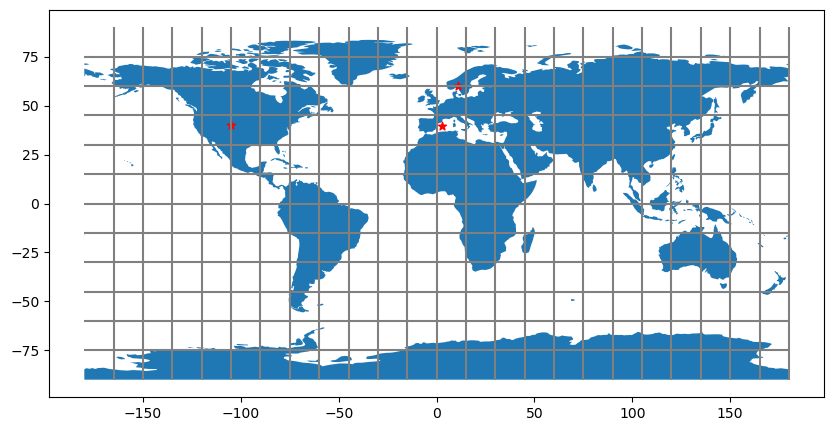

In [26]:
# Plot on map - looks great
import matplotlib.pyplot as plt

# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

f, ax = plt.subplots(figsize = (10, 7))

worldBound.plot(ax = ax)
test_cities.plot(ax = ax, marker = "*", color = "red")
graticule.plot(ax = ax, color = "grey")

ax.set_axisbelow(True);

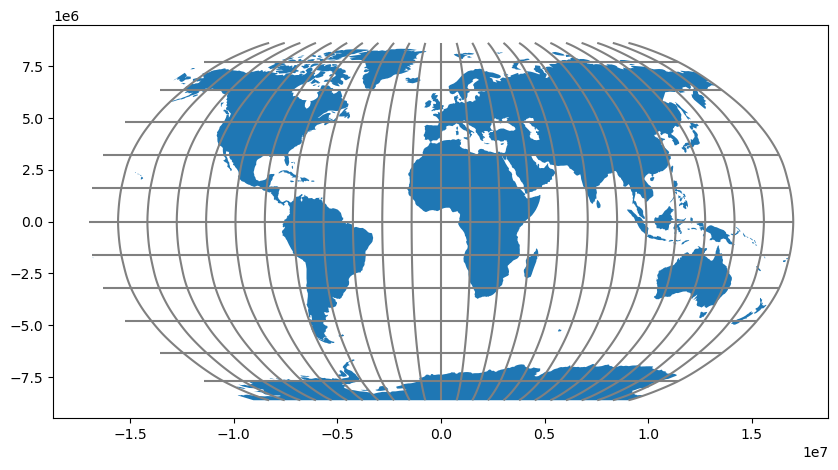

In [31]:
# Geographic coordinate systems in decimal degrees are helpful when you need to locate places on the Earth. 
# However, latitude and longitude locations are not located using uniform measurement units. Thus, geographic 
# CRSs are not ideal for measuring distance. This is why other projected CRS have been developed.

# Try Robinson CRS
worldBound_robin = worldBound.to_crs("+proj=robin")
graticule_robin = graticule.to_crs("+proj=robin")

f, ax = plt.subplots(figsize = (10, 7))

worldBound_robin.plot(ax = ax)
graticule_robin.plot(ax = ax, color = "grey")

ax.set_axisbelow(True);

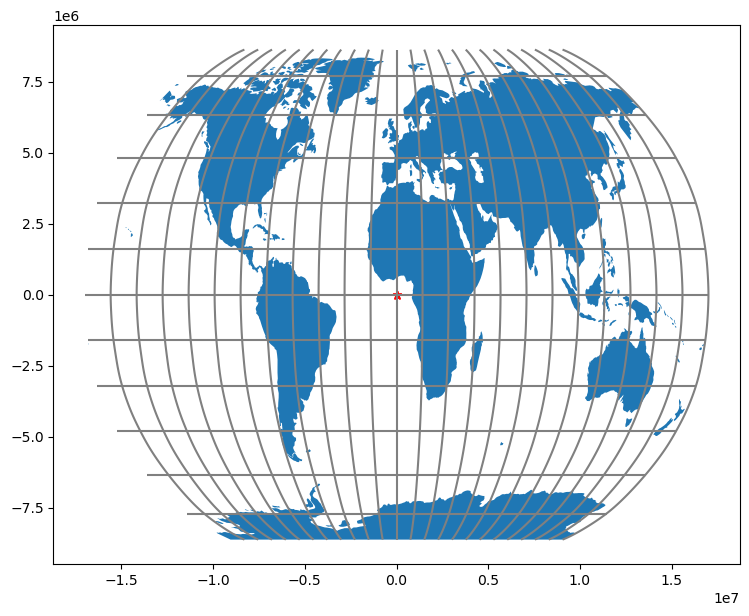

In [32]:
# However, if you try and add test_cities, disaster strikes
# Did not change the crs so it was plotted incorrectly.
# Can clearly see in the units of the two maps
f, ax = plt.subplots(figsize = (10, 7))

worldBound_robin.plot(ax = ax)
graticule_robin.plot(ax = ax, color = "grey")
test_cities.plot(ax = ax, color = "red", marker = "*")

ax.set_axisbelow(True);

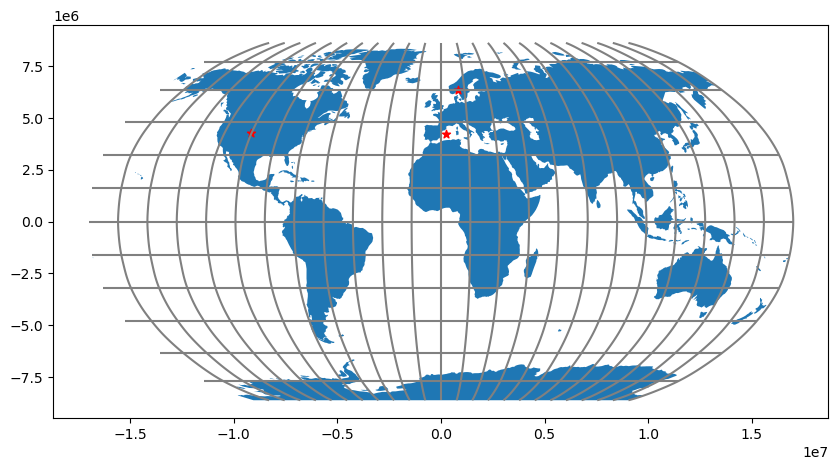

In [34]:
f, ax = plt.subplots(figsize = (10, 7))

# Amend CRS
test_cities_robin = test_cities.to_crs(worldBound_robin.crs)

worldBound_robin.plot(ax = ax)
graticule_robin.plot(ax = ax, color = "grey")
test_cities_robin.plot(ax = ax, color = "red", marker = "*")

ax.set_axisbelow(True);

In [35]:
# Geographic vs. Projected CRS
# The above maps provide examples of the two main types of coordinate systems:
#     Geographic coordinate systems: coordinate systems that span the entire globe (e.g. latitude / longitude).
#     Projected coordinate Systems: coordinate systems that are localized to minimize visual distortion in a 
#     particular region (e.g. Robinson, UTM, State Plane)

# The classic geographic coordinate system is WGS84, which has an origin at 0,0
# The classic projected coordinate system is UTM (universal transverse mercator)

In [36]:
# On the previous pages, you learned what a coordinate reference system (CRS) is, the components of a coordinate
# reference system and the general differences between projected and geographic coordinate reference systems.
# On this page, you will cover the different ways that CRS information is stored.

# There are numerous formats that are used to document a CRS. Three common formats include:

#     proj.4
#     EPSG
#     Well-known Text (WKT) formats.

In [37]:
# ### Proj4

# Below is an example of a proj.4 string:

# +proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0

# Notice that the crs information is structured using a string of characters and numbers that are combined using + signs. 
# The CRS for your data are in the proj4 format. The string contains all of the individual CRS elements that Python or 
# another GIS might need. Each element is specified with a + sign, similar to how a .csv file is delimited or broken up 
# by a ,. After each + we see the CRS element being defined. For example +proj= and +datum=.

# You can break down the proj4 string into its individual components (again, separated by + signs) as follows:

#     +proj=utm: the projection is UTM, UTM has several zones.
#     +zone=11: the zone is 11 which is a zone on the west coast, USA.
#     datum=WGS84: the datum WGS84 (the datum refers to the 0,0 reference for the coordinate system used in the projection)
#     +units=m: the units for the coordinates are in METERS.
#     +ellps=WGS84: the ellipsoid (how the earth’s roundness is calculated) for the data is WGS84

# Note that the zone is unique to the UTM projection. Not all CRS will have a zone.

# Also note that while California is above the equator - in the northern hemisphere - there is no N (specifying north) 
# following the zone (i.e. 11N) South is explicitly specified in the UTM proj4 specification however if there is no S, 
# then you can assume it’s a northern projection.

# ### Geographic (lat / long) Proj.4 String

# Next, look at another CRS definition.

# +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0

# This is a lat/long or geographic projection. The components of the proj4 string are broken down below.

#     +proj=longlat: the data are in a geographic (latitude and longitude) coordinate system
#     datum=WGS84: the datum WGS84 (the datum refers to the 0,0 reference for the coordinate system used in the projection)
#     +ellps=WGS84: the ellipsoid (how the earth’s roundness is calculated) is WGS84

# Note that there are no specified units above. This is because this geographic coordinate reference system is in 
# latitude and longitude which is most often recorded in Decimal Degrees.

# Data Tip: the last portion of each proj4 string is +towgs84=0,0,0 . 
#     This is a conversion factor that is used if a datum conversion is required.

In [38]:
# ### EPSG codes

# The EPSG codes are 4-5 digit numbers that represent CRSs definitions. The acronym EPSG, comes from the now defunct
# European Petroleum Survey Group. Each code is a four-five digit number which represents a particular CRS definition.

In [39]:
# Creating CRS objects is now relatively easy in geopandas

# Create a numpy array with x,y location of Boulder
boulder_xy = np.array([[476911.31, 4429455.35]])

# Create shapely point object
boulder_xy_pt = [Point(xy) for xy in boulder_xy]

# Convert to spatial dataframe - geodataframe -- assign the CRS using epsg code
boulder_loc = gpd.GeoDataFrame(boulder_xy_pt,
                               columns=['geometry'],
                               crs='EPSG:2957') # Just need to state 'authority:number'

# View crs of new spatial points object
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada between 108°W and 102°W onshore and offshore - Northwest Territories, Nunavut, Saskatchewan.
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
### WKT or Well-known Text

# It’s useful to recognize this format given many tools - including ESRI’s ArcMap and ENVI use this format.
# Well-known Text (WKT) is a for compact machine- and human-readable representation of geometric objects. 
# It defines elements of coordinate reference system (CRS) definitions using a combination of brackets [] and 
# elements separated by commas (,).

# Here is an example of WKT for WGS84 geographic:

# GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],
#        PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]

# Sometimes WKT structured CRS information are embedded in a metadata file - similar to the structure seen below:


# GEOGCS["WGS 84",
#     DATUM["WGS_1984",
#         SPHEROID["WGS 84",6378137,298.257223563,
#             AUTHORITY["EPSG","7030"]],
#         AUTHORITY["EPSG","6326"]],
#     PRIMEM["Greenwich",0,
#         AUTHORITY["EPSG","8901"]],
#     UNIT["degree",0.01745329251994328,
#         AUTHORITY["EPSG","9122"]],
#     AUTHORITY["EPSG","4326"]]

In [41]:
# The most powerful website to look-up CRS information is the spatial reference.org website. 
# This website has a useful search function that allows you to search for strings such as:

#     UTM 11N or
#     WGS84

# Once you find the CRS that you are looking for, you can explore definitions of the CRS using various formats 
# including proj4, epsg, WKT and others.

EPSG:4269
EPSG:32611


<Axes: >

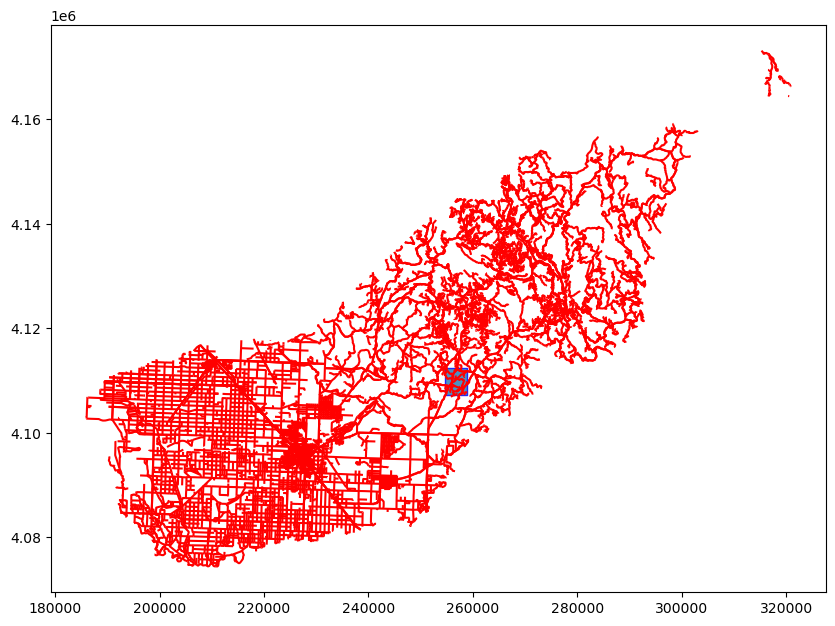

In [50]:
### Review

sjer_roads = gpd.read_file('spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')
sjer_crop_extent = gpd.read_file('spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')

# Different CRS, we'll need to change one of them to fit
print(sjer_roads.crs)
print(sjer_crop_extent.crs)

f, ax = plt.subplots(figsize = (10,10))

# reproject CRS - very easy!
sjer_roads_UTM = sjer_roads.to_crs("EPSG:32611")

sjer_roads_UTM.plot(color = "red", ax = ax)
sjer_crop_extent.plot(edgecolor = "blue", ax = ax, alpha = 0.8)

In [53]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us EPSG:4326
state_boundary_us EPSG:4326
pop_places EPSG:4326


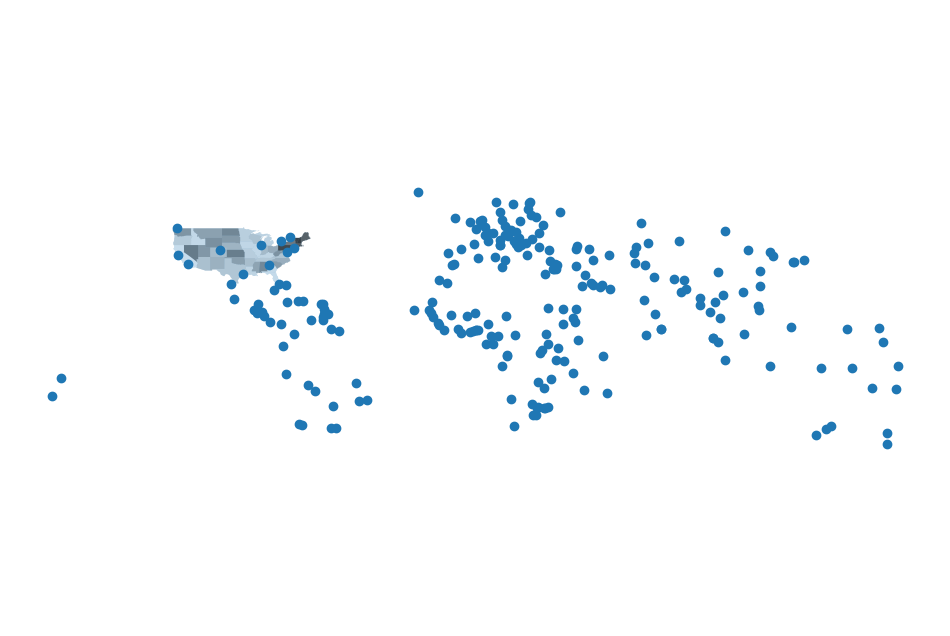

In [54]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
178,1,300,1,Populated place,Miami,NaN,NaN,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
177,1,300,1,Populated place,Houston,NaN,NaN,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
179,1,300,1,Admin-1 capital,Atlanta,NaN,NaN,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.40190 33.83196)
216,0,600,1,Populated place,Los Angeles,NaN,Los Angeles-Long Beach-Santa Ana,0,Los Angeles,0.0,...,142265,14,12,5368361.0,Los Angeles-Long Beach-Santa Ana,Los Angeles1,1,0,2.0,POINT (-118.18193 33.99192)
175,1,300,1,Populated place,San Francisco,NaN,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.76920)


<Axes: >

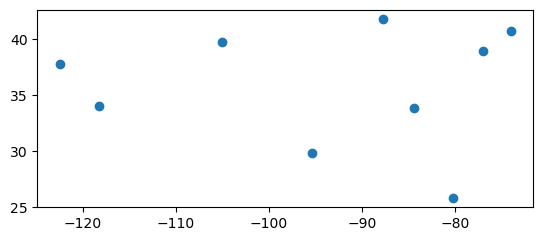

In [58]:
# You can clip vector files using the gpd .clip() method
# note that mask automatically clips by .total_bounds_

us_places = gpd.clip(pop_places, mask = country_boundary_us)

display(us_places.head())

us_places.plot()

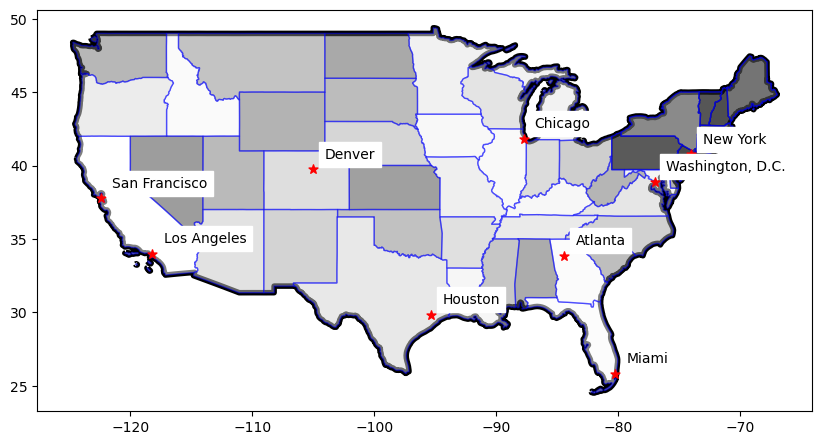

In [76]:
# Plot onto map

f, ax = plt.subplots(figsize = (10,7))

country_boundary_us.plot(ax = ax, color = "none", edgecolor = "black", linewidth = 4)
state_boundary_us.plot(ax = ax, cmap = "Greys", edgecolor = "blue", alpha = 0.5, linewidth = 1)
us_places.plot(ax = ax, color = "red", marker = "*", markersize = 45)

# How to annotate down the dataframe
us_places.apply(lambda x: ax.annotate(text=x['name'],
                                        xy=x.geometry.coords[0], # the origin from which the xytext/textcoords args will be measured
                                        xytext=(8, 8), textcoords="offset points", # adjust position of text
                                        backgroundcolor="white"),
                  axis=1); # THIS IS THE MOST IMPORTANT PART!!

<Axes: >

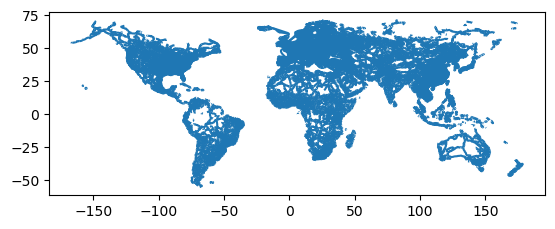

In [77]:
### Clip a Line or Polygon Layer to An Extent

# The process for clipping a line or polygon layer is slightly different than clipping a set of points. To clip a line 
# of polygon feature you will do the following:

#     Ensure that your polygon and line layer are in the same coordinate reference system
#     Identify what features in the lines layer fall WITHIN the boundary of the polygon layer
#     Subset the features within the geometry and reset the geometry of the newly clipped layer to be equal to the clipped data.

# This last step may seem unusual. When you clip data using shapely and geopandas the default behaviour is for it to 
# only return the clipped geometry. However you may wish to also retain the attributes associated with the geometry.
# This is where the set_geometry() method comes into play.

# Open the roads layer
ne_roads_path = os.path.join("spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

ne_roads.plot()

In [78]:
# check that ne_roads and country_boundary_us are in the same extent
print(ne_roads.crs)
print(country_boundary_us.crs)

EPSG:4326
EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
2726,6,Road,Secondary Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0,0,NaN,234205,North America,0,Federal,6.0,8.5,MULTILINESTRING Z ((-81.64398 24.60215 0.00000...
2725,6,Road,Secondary Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0,0,NaN,234105,North America,0,Federal,6.0,8.5,"LINESTRING Z (-80.39393 25.18804 0.00000, -80...."
4144,5,Road,Major Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0,0,NaN,234105,North America,1,Federal,5.0,8.0,"LINESTRING Z (-80.47728 25.45343 0.00000, -80...."
49423,8,Road,Major Highway,USA,NaN,New in version 2.0.0,821,NaN,NaN,NaN,...,0,771,NaN,8466,North America,0,State,7.1,9.6,"LINESTRING Z (-80.47449 25.45297 0.00000, -80...."
2709,3,Road,Major Highway,USA,NaN,New in version 2.0.0,75,NaN,NaN,NaN,...,0,0,NaN,232105,North America,1,Interstate,3.0,6.0,"LINESTRING Z (-81.67206 26.15532 0.00000, -81...."


CPU times: total: 1.06 s
Wall time: 1.06 s


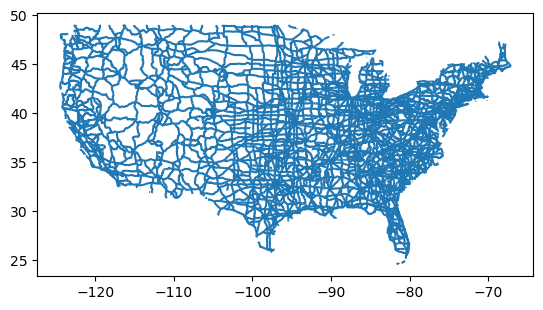

In [80]:
%%time

# Create a simplified geometry of the US borders to improve speed. 
# preserve_topology is slower but ensure that there are no invalid polygons
country_boundary_us_sim = country_boundary_us.simplify(tolerance = 0.2, preserve_topology = True)

ne_roads_clipped = gpd.clip(ne_roads, country_boundary_us_sim)

display(ne_roads_clipped.head())

ne_roads_clipped.plot();

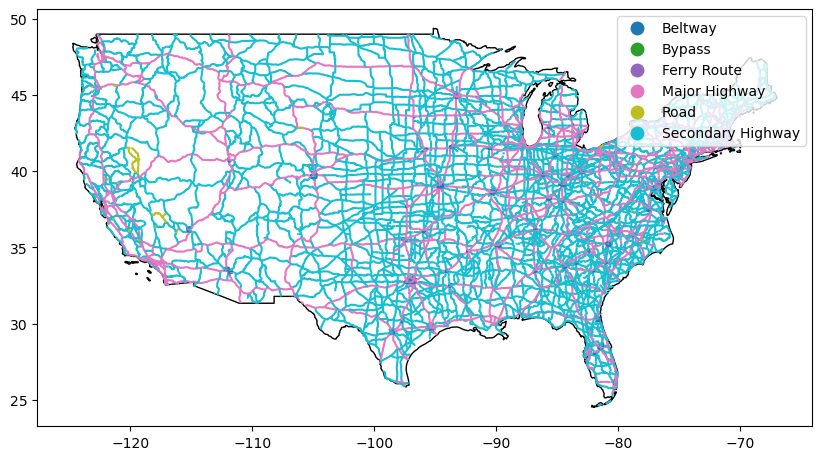

In [82]:
f, ax = plt.subplots(figsize = (10,7))

country_boundary_us.plot(ax = ax, color = "white", edgecolor = "black")
ne_roads_clipped.plot(column = "type", cmap = "tab10", ax = ax, legend = True);

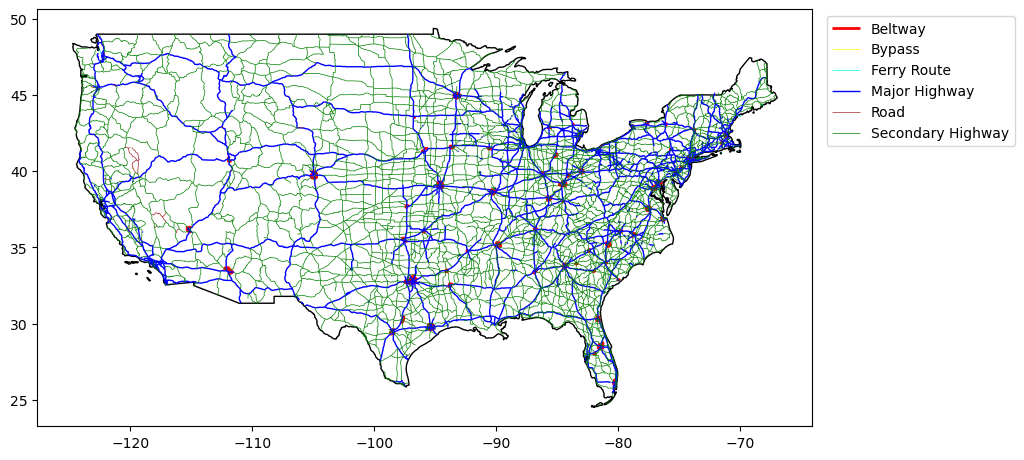

In [94]:
# Although gpd.plot is good, making legends with it can be pretty fucked.

f, ax = plt.subplots(figsize = (10,7))

country_boundary_us.plot(ax = ax, color = "white", edgecolor = "black")

# Create cmap dictionary
road_attrs = {'Beltway': ['red', 2],
              'Secondary Highway': ['green', .5],
              'Road': ['brown', .5],
              'Bypass': ['yellow', .5],
              'Ferry Route': ['cyan', .5],
              'Major Highway': ['blue', 1]}

for ctype, data in ne_roads_clipped.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              linewidth=road_attrs[ctype][1],
              ax=ax)
    
ax.legend(loc = "upper right", bbox_to_anchor = (1.27, 1));

In [95]:
### Dissolving polygons based on attribute

# Consists of polygons and multipolygons - the latter can sometimes cause issues during processing
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<Axes: >

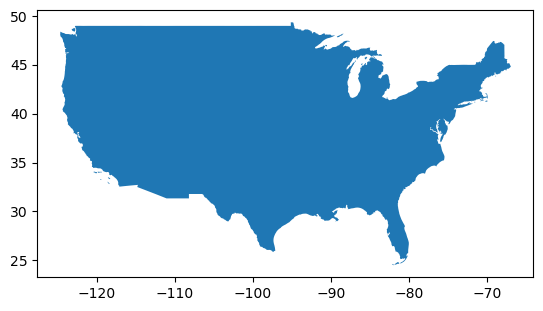

In [96]:
# LSAD for all polygons is 00 - so only a single polygon is left
cont_usa = state_boundary_us.dissolve("LSAD")

cont_usa.plot()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
region,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",171926272955183139463820,0177978401779785017797890066284901779791017798...,0400000US170400000US190400000US260400000US2704...,171926272955183139463820,ILIAMIMNMOWIINNEOHSDNDKS,IllinoisIowaMichiganMinnesotaMissouriWisconsin...,000000000000000000000000,1943869253244,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",112436092325104442503334360923254442503334,0170238201714934017797960177978001779787006069...,0400000US110400000US240400000US360400000US0904...,112436092325104442503334360923254442503334,DCMDNYCTMEMADERIPAVTNHNJNYCTMEMARIPAVTNHNJ,District of ColumbiaMarylandNew YorkConnecticu...,000000000000000000000000000000000000000000,869066138232,108922434345
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",121321224751053728455401,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",48043540,01779801017797770089753501102857,0400000US480400000US040400000US350400000US40,48043540,TXAZNMOK,TexasArizonaNew MexicoOklahoma,00000000,1462631530997,24217682268
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",061641083049535632,0177977801779783011551070177977900767982014559...,0400000US060400000US160400000US410400000US0804...,061641083049535632,CAIDORCOMTUTWAWYNV,CaliforniaIdahoOregonColoradoMontanaUtahWashin...,000000000000000000,2432336444730,57568049509


<Axes: >

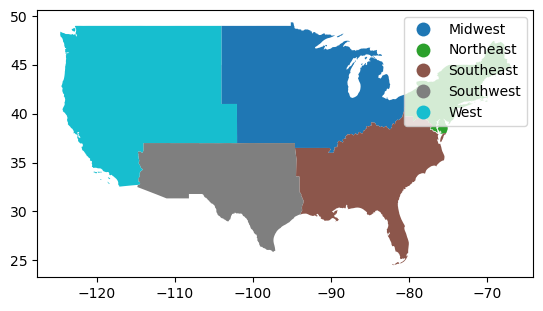

In [102]:
# When you dissolve polygons, you will need to tell geopandas what you want to do with numerical data in the attributes
# Should they be summed? Should the maximum value be retained? This depends on your use case

# For example, ALAND and AWATER = Land area and water area - we probably want to sum this.

regional_usa = state_boundary_us.dissolve("region", aggfunc="sum")

display(regional_usa.head())

# note that this doesn't work, because when you dissolve, the column you dissolved by becomes the index
# regional_usa.plot(column = "region")

# reset index
regional_usa.reset_index().plot(column = "region", legend = True)

In [103]:
# Convert ALAND and AWATER from sq.km to hectares
regional_usa["land_ha"] = regional_usa["ALAND"] / 10000
regional_usa["water_ha"] = regional_usa["AWATER"] / 10000

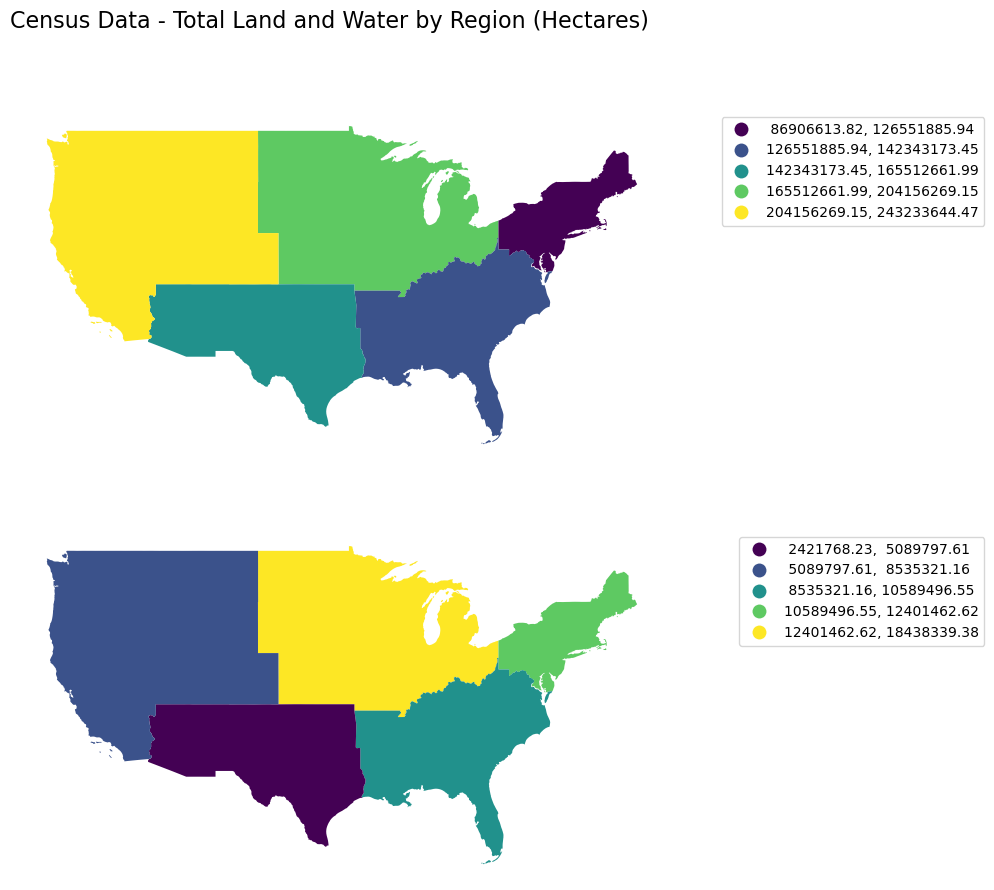

In [105]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

regional_usa.plot(column='land_ha',
                 legend=True,
                 scheme="quantiles",
                 ax=ax1)

regional_usa.plot(column='water_ha',
                 scheme="quantiles",
                 legend=True,
                 ax=ax2)

plt.suptitle('Census Data - Total Land and Water by Region (Hectares)', fontsize=16)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

# plt.axis('equal')
plt.show()


In [106]:
### SPATIAL JOINS

# A spatial join is when you append the attributes of one layer to another based upon its spatial relationship.
# This is a key functionality of geopandas.

# To apply a join you can use the geopandas.sjoin() function as following:

# .sjoin(layer-to-add-region-to, region-polygon-layer)

# Sjoin Arguments:

# The op argument specifies the type of join that will be applied

#     intersects: Returns True if the boundary and interior of the object intersect in any way with those of the other.
#     within: Returns True if the object’s boundary and interior intersect only with the interior of the other 
#         (not its boundary or exterior).
#     contains: Returns True if the object’s interior contains the boundary and interior of the other object and their 
#         boundaries do not touch at all.

# How allows the following options:

#     ‘left’: use keys from left_df; retain only left_df geometry column
#     ‘right’: use keys from right_df; retain only right_df geometry column
#     ‘inner’: use intersection of keys from both dfs; retain only left_df geometry column

# Remember that you don't need to specify an "on" - by default, you are joining on the "geometry" column

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,land_ha,water_ha
2726,6,Road,Secondary Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998,1.364632e+08,1.038767e+07
2725,6,Road,Secondary Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998,1.364632e+08,1.038767e+07
4144,5,Road,Major Highway,USA,NaN,New in version 2.0.0,1,NaN,NaN,NaN,...,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998,1.364632e+08,1.038767e+07
49423,8,Road,Major Highway,USA,NaN,New in version 2.0.0,821,NaN,NaN,NaN,...,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998,1.364632e+08,1.038767e+07
2709,3,Road,Major Highway,USA,NaN,New in version 2.0.0,75,NaN,NaN,NaN,...,0029447801705317017797860162954301325873017798...,0400000US120400000US130400000US210400000US2204...,121321224751053728455401,FLGAKYLATNVAARNCMSSCWVAL,FloridaGeorgiaKentuckyLouisianaTennesseeVirgin...,000000000000000000000000,1364632039655,103876652998,1.364632e+08,1.038767e+07


<Axes: >

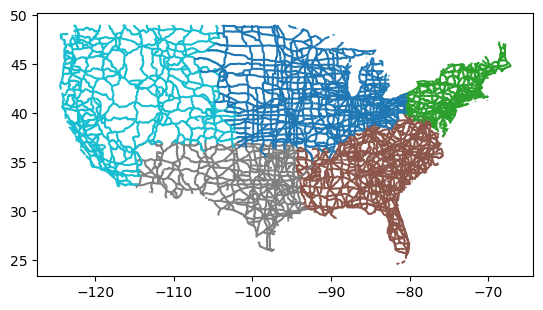

In [109]:
# Let's join the US roads onto the regional_usa dataframe

# remember to reset region index!
regional_roads = gpd.sjoin(ne_roads_clipped, regional_usa.reset_index(), predicate = "intersects", how = "inner")

display(regional_roads.head())

regional_roads.plot(column = "region")

<Axes: >

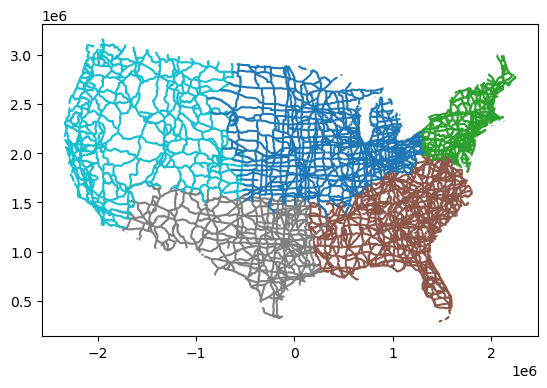

In [110]:
# Reprojecting took a long time because of the sheer number of objects
regional_roads_albers = regional_roads.to_crs("EPSG:5070")

regional_roads_albers.plot(column = "region")

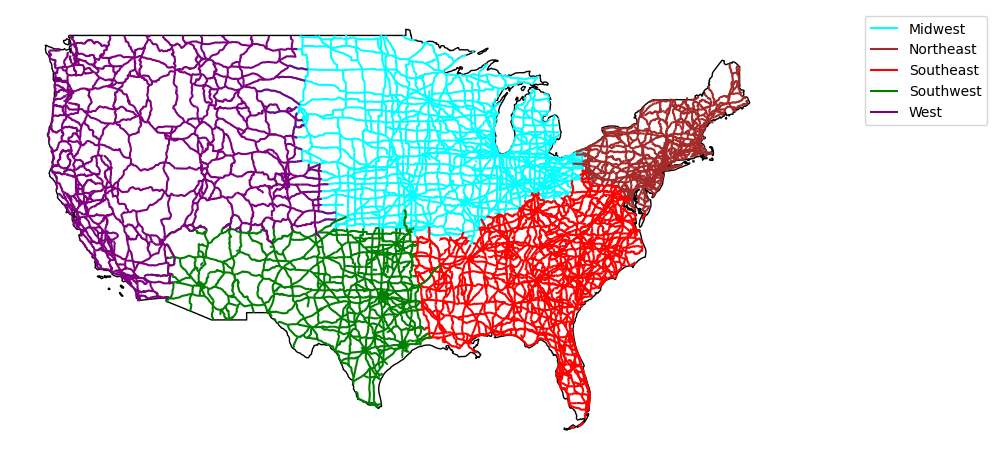

In [115]:
# as previously mentioned, you can do your own legends

f, ax = plt.subplots(figsize = (10,7))

country_boundary_us.plot(ax = ax, color = "white", edgecolor = "black")

# Create cmap dictionary - find regions using regional_roads.region.unique()
road_attrs = {'Southeast': ['red'],
              'Southwest': ['green'],
              'Northeast': ['brown'],
              'West': ['purple'],
              'Midwest': ['cyan']}

for ctype, data in regional_roads.groupby('region'):
    data.plot(color=road_attrs[ctype][0],
                          label=ctype,
                          ax=ax)
ax.axis("off")
ax.legend(loc = "upper right", bbox_to_anchor = (1.27, 1));

In [118]:
# Turn off scientific notation
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

# Find the length of road in each region
regional_roads[["region", "length_km"]].groupby("region").sum()

,length_km
region,
Midwest,95069
Northeast,37437
Southeast,87124
Southwest,51690
West,66269


In [122]:
# Note the differences - the above is calculated based on the data given, while this is calculated from the shapefiles
regional_roads_albers["road_length_m"] = regional_roads_albers.length / 1000

regional_roads_albers[["region", "road_length_m"]].groupby("region").sum()

,road_length_m
region,
Midwest,86574.9949
Northeast,33775.7814
Southeast,84330.1268
Southwest,49373.1057
West,61379.8342


In [124]:
### Dealing with missing data

# Import roads shapefile
sjer_roads_path = os.path.join("spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# Some data is missing
sjer_roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LINEARID  9640 non-null   object  
 1   FULLNAME  4491 non-null   object  
 2   RTTYP     4491 non-null   object  
 3   MTFCC     9640 non-null   object  
 4   geometry  9640 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 376.7+ KB


In [126]:
display(sjer_roads.head())

# Clearly FULLNAME is the road name, but what is RTTYP?
sjer_roads.RTTYP.unique()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."


array(['M', nan, 'S', 'C'], dtype=object)

In [128]:
# Replace missing values using fillna
sjer_roads["RTTYP"].fillna("Unknown", inplace = True)

sjer_roads["RTTYP"].unique()

array(['M', 'Unknown', 'S', 'C'], dtype=object)

In [131]:
plot_locations = gpd.read_file("spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp")
sjer_crop = gpd.read_file("spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp")

print(sjer_roads.crs)
print(plot_locations.crs)
print(sjer_crop.crs)

EPSG:4269
EPSG:32611
EPSG:32611


<Axes: >

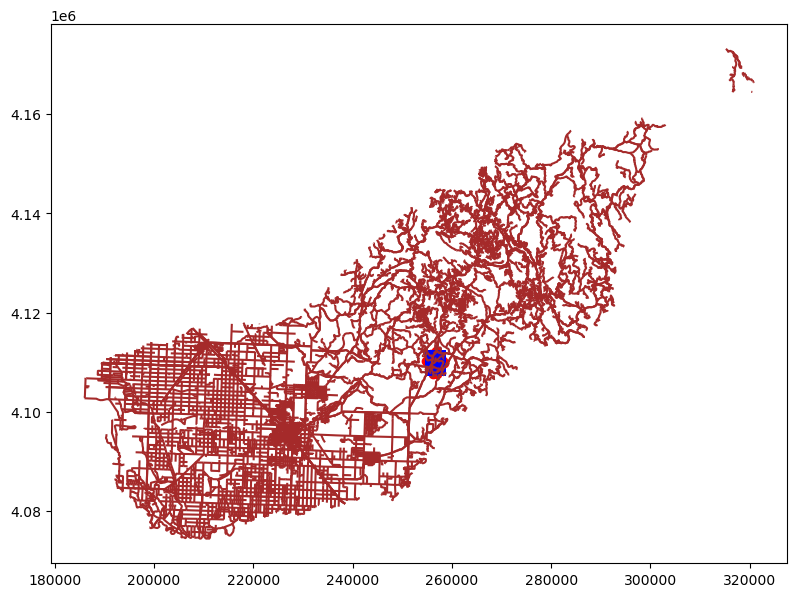

In [134]:
# sjer_roads is in the wrong CRS - reproject
sjer_roads_reproj = sjer_roads.to_crs('EPSG:32611')

f, ax = plt.subplots(figsize = (10,7))

sjer_roads_reproj.plot(ax = ax, color = "brown")
plot_locations.plot(ax = ax, color = "red")
sjer_crop.plot(ax = ax, color = "blue")

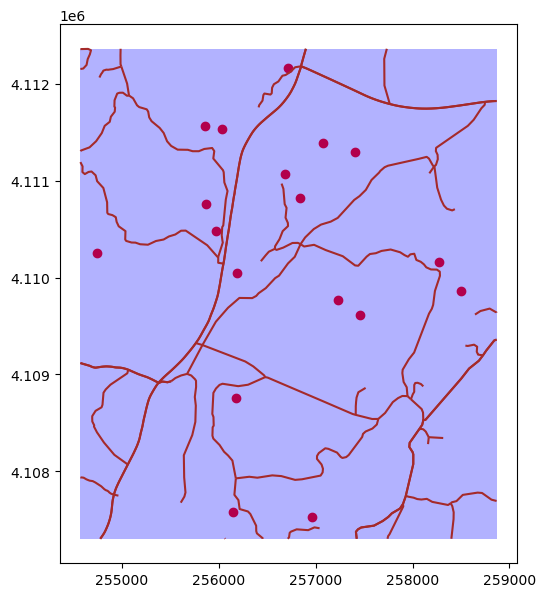

In [136]:
# Time to clip - nice and easy!
sjer_roads_clipped = gpd.clip(sjer_roads_reproj, sjer_crop)

f, ax = plt.subplots(figsize = (10,7))

sjer_roads_clipped.plot(ax = ax, color = "brown")
plot_locations.plot(ax = ax, color = "red")
sjer_crop.plot(ax = ax, color = "blue", alpha = 0.3);